TASK 1

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
X = df.drop("Species", axis=1)
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X)
print(y)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virgin

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

lsvc=LinearSVC(verbose=0)
print(lsvc)

lsvc.fit(X_train, y_train)
score=lsvc.score(X_train, y_train)
print("Score: ",score)

cv_scores=cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" %cv_scores.mean())

ypred=lsvc.predict(X_test)

cm=confusion_matrix(y_test,ypred)
print(cm)

cr=classification_report(y_test,ypred)
print(cr)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True, intercept_scaling=1, loss='squared_hinge', max_iter=1000, multi_class='ovr', penalty='12', random_state=None, tol=0.0001, verbose=0)

LinearSVC()
Score:  0.8761904761904762
CV average score: 0.87
[[16  0  0]
 [ 0 12  6]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.67      0.80        18
 Iris-virginica       0.65      1.00      0.79        11

       accuracy                           0.87        45
      macro avg       0.88      0.89      0.86        45
   weighted avg       0.91      0.87      0.87        45



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC(penalty='12')

TASK 2

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
linear_svc = SVC(kernel='linear', C=1)
linear_svc.fit(X_train, y_train)

poly_svc = SVC(kernel='poly', degree=3, C=1)
poly_svc.fit(X_train, y_train)

rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1)
rbf_svc.fit(X_train, y_train)

SVC(C=1, gamma=0.7)

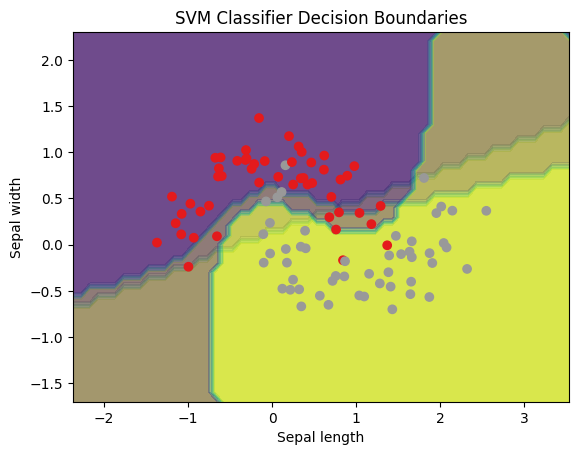

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

linear_pred = linear_svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
poly_pred = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
rbf_pred = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, linear_pred, alpha=0.4)
plt.contourf(xx, yy, poly_pred, alpha=0.4)
plt.contourf(xx, yy, rbf_pred, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Classifier Decision Boundaries')
plt.show()

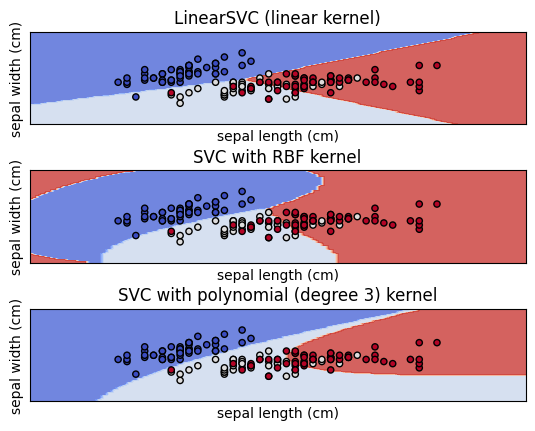

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
C=1.0
models = (
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

titles = (
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(3,1)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

TASK 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = pd.read_csv('/content/Iris.csv')

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf_linear = SVC(kernel='linear')
clf_rbf = SVC(kernel='rbf')
clf_poly = SVC(kernel='poly')
clf_linear.fit(X_train, y_train)
clf_rbf.fit(X_train, y_train)
clf_poly.fit(X_train, y_train)

acc_linear = clf_linear.score(X_test, y_test)
acc_rbf = clf_rbf.score(X_test, y_test)
acc_poly=clf_poly.score(X_test, y_test)

print(f"Accuracy of SVC classifier with linear kernel: {acc_linear:.2f}")
print(f"Accuracy of SVC classifier with RBF kernel: {acc_rbf:.2f}")
print(f"Accuracy of SVC classifier with polynomial kernel: {acc_poly:.2f}")
import time

start_time = 0


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.2f}")


Accuracy of SVC classifier with linear kernel: 1.00
Accuracy of SVC classifier with RBF kernel: 1.00
Accuracy of SVC classifier with polynomial kernel: 0.96
Elapsed time: 1682655013.96


TASK 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

iris = pd.read_csv('/content/Iris.csv')

X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

C_range = uniform(loc=0, scale=10)
gamma_range = uniform(loc=0, scale=1)

param_grid = {'C': C_range, 'gamma': gamma_range}

clf = SVC(kernel='rbf')
search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=50, n_jobs=-1, cv=5)
search.fit(X_train, y_train)

print("Best hyperparameters found by RandomizedSearchCV:")
print(search.best_params_)

clf_best = SVC(kernel='rbf', C=search.best_params_['C'], gamma=search.best_params_['gamma'])
clf_best.fit(X_train, y_train)

acc_best = clf_best.score(X_test, y_test)

print(f"Accuracy of improved SVC classifier: {acc_best:.2f}")
import time

start_time = 0


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.2f}")


Best hyperparameters found by RandomizedSearchCV:
{'C': 9.539393460733377, 'gamma': 0.15794135639416063}
Accuracy of improved SVC classifier: 1.00
Elapsed time: 1682654991.57
